In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
#from classy import Class
%matplotlib inline
#import s1 
import ST
from scipy.integrate import trapz

In [39]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rcParams["figure.figsize"] = (6,5)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
nside = 512


In [4]:
lmax = 3*nside -1 
res_rad = hp.nside2resol(nside, arcmin = False)
res_arcmin = hp.nside2resol(nside, arcmin = True)

In [5]:
ell = np.arange(0,lmax+1)
ellsc = 21600/ell
norm= ell * (ell+1) / (2*np.pi)

/var/folders/vj/5ltjqv9d4px7nr3d4mbmk9_m0000gn/T/ipykernel_1102/2172233455.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 21600/ell


In [6]:
jmax = 10

In [7]:
sz_map = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits")


In [8]:
sz_mask = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_Mask_Compton-SZMap_2048_R2.00.fits")

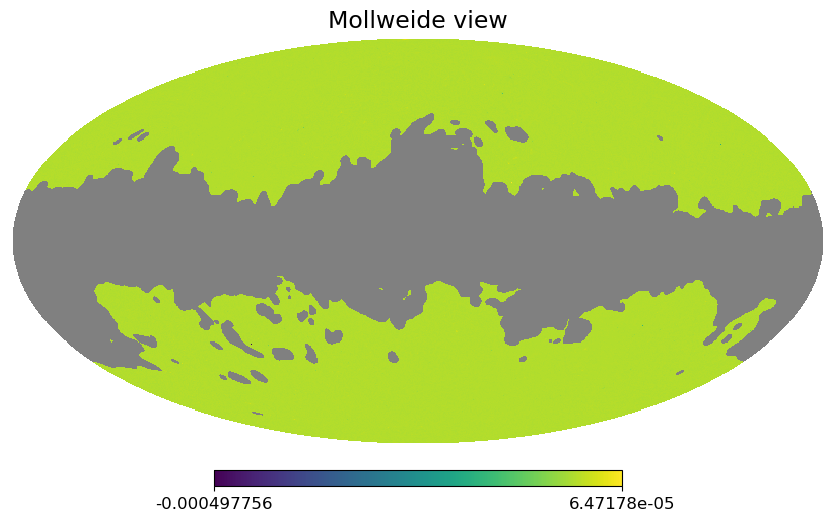

In [9]:
sz_milca_masked = hp.ma(sz_map)
sz_milca_masked.mask = np.logical_not (sz_mask)
hp.mollview(sz_milca_masked )

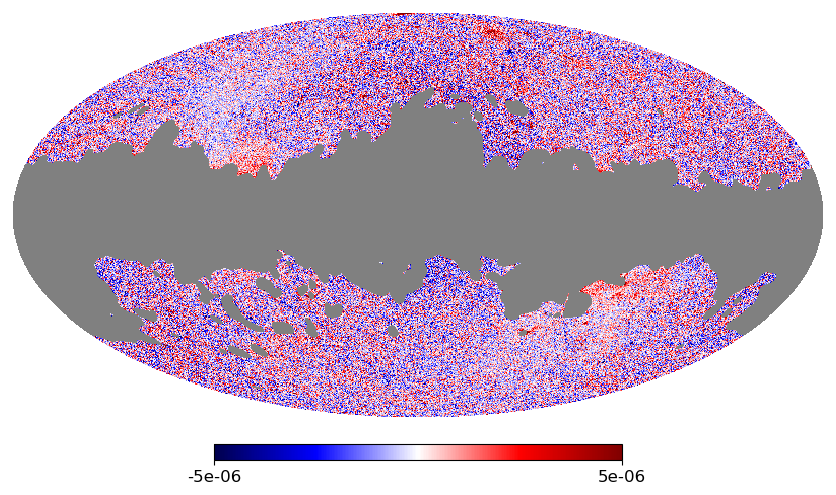

In [10]:
hp.mollview(sz_milca_masked , min = -0.000005 , max = 0.000005 , cmap = "seismic" , title="" )


In [11]:
sz_milca_masked = hp.ud_grade(sz_milca_masked, nside_out=nside)

In [12]:
sz_cl = hp.anafast(sz_milca_masked)

In [13]:
sz_dl = sz_cl*ell*(ell+1)/np.pi/2

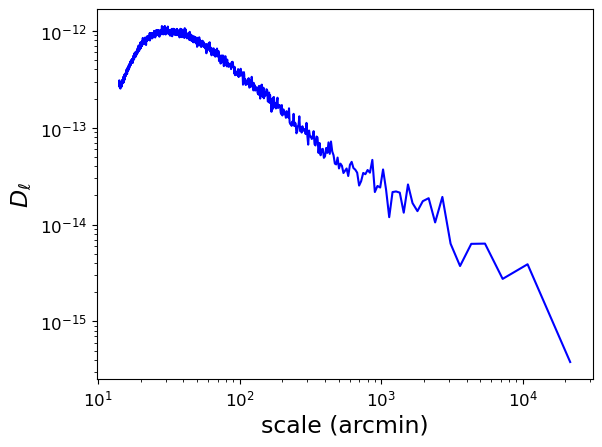

In [14]:
plt.loglog (ellsc, sz_dl , color = "blue")
#plt.loglog(scale, milca_s1**2, 'o-', lw=1.5 , color = "blue")
plt.xlabel("scale (arcmin)")
plt.ylabel (r"$D_\ell$")
plt.savefig("SZ_CL.pdf")

In [15]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [16]:
Jf=np.arange(jmax)
scale = 2**Jf*((2*res_arcmin)/0.75)


In [17]:
milca_s0 = np.mean (sz_milca_masked)

In [18]:
milca_s1 , milca_i1 = ST.compS1(sz_milca_masked, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9


In [49]:
milca_s2 , milca_i2 = ST.compS2(milca_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9


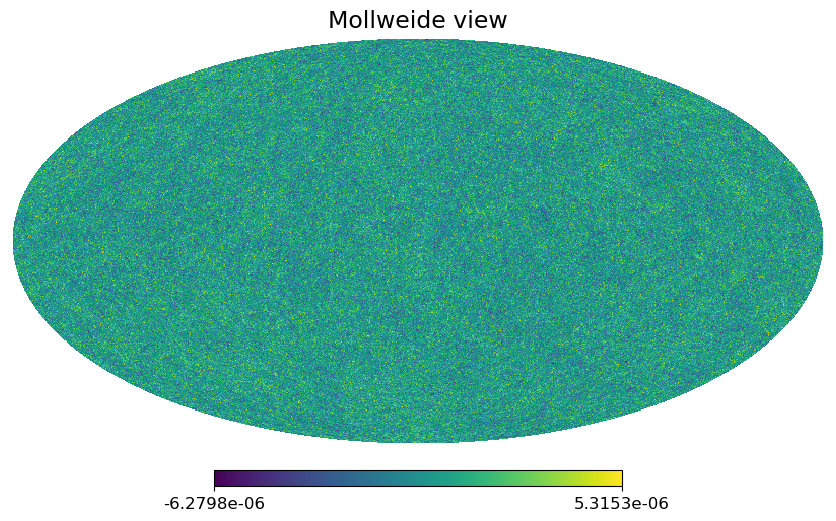

In [20]:
gaus_map = hp.synfast(sz_cl, nside)
hp.mollview(gaus_map)

In [32]:
gaus_s1 , gaus_i1 = ST.compS1(gaus_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9


In [48]:
gaus_s2 , gaus_i2 = ST.compS2(gaus_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9


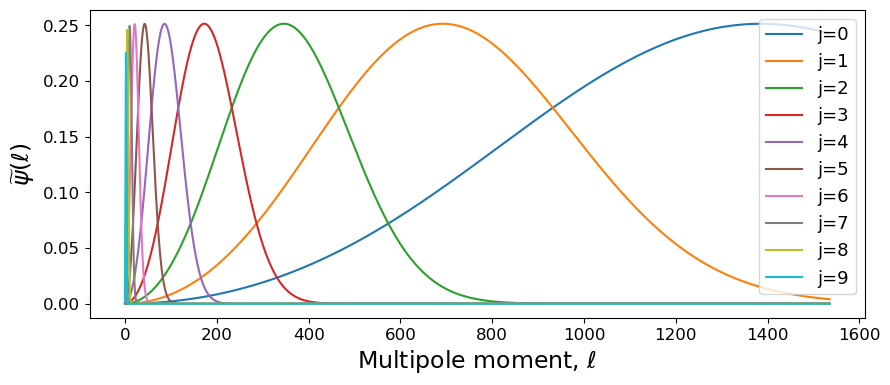

In [47]:
fig=plt.figure(figsize=[10,4])
for j in range(jmax):
    #plt.plot(ell,np.real(morlet_l_arr_prj[j]),label='j='+str(j))
    plt.plot(ell,np.real(morlet_l_arr[j]),label='j='+str(j))
    plt.legend(prop={'size': 13})
    
#plt.yscale("log")
plt.xlabel("Multipole moment, $\ell$", size=17)
plt.ylabel("$\widetilde{\psi}(\ell)$", size=17)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig("profile.pdf",bbox_inches = 'tight')

In [1]:
k = np.arange (5000)*0.001
kp = k /res_rad
fig=plt.figure(figsize=[10,4])
for j in range (0,jmax):
    
    sigma = 0.8*2**j
    k0 = 3*np.pi/(4*2**j)
    
    beta = np.exp (-k0**2 * sigma**2/2)
    mork = np.exp (-(k-k0)**2 * sigma**2/2) - beta * np.exp (-k**2 * sigma**2/2)
    #fig=plt.figure(figsize=[10,4])
#for j in range(jmax):
    #plt.plot(ell,np.real(morlet_l_arr_prj[j]),label='j='+str(j))
    plt.plot(kp,np.real(mork),label='j='+str(j))
    plt.legend(prop={'size': 13})
    plt.plot(ell,np.real(morlet_l_arr[j])/np.max(np.real(morlet_l_arr[j])),label='j='+str(j))
    plt.legend(prop={'size': 13})
    
#plt.yscale("log")
    plt.xlabel("Frequency (k)", size=17)
    plt.ylabel("$\widetilde{\psi}(k)$", size=17)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlim (0,100)
    #plt.savefig("profile2.pdf",bbox_inches = 'tight')

NameError: name 'np' is not defined

In [196]:
res_rad

0.0019986849764579854

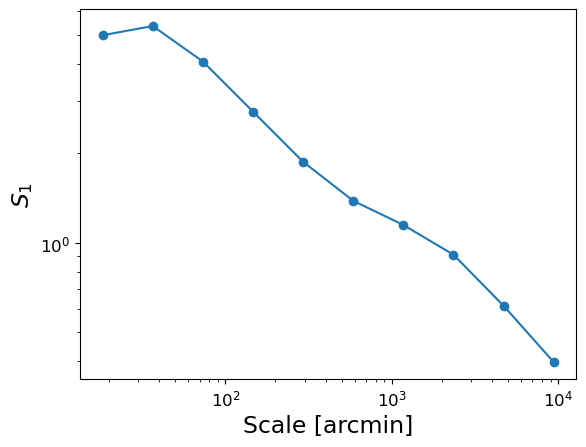

In [30]:
plt.loglog(scale, np.abs(milca_s1/milca_s0), 'o-', lw=1.5)
#plt.loglog(scale, gaus_s1/gaus_s0, 'o-', lw=1.5 )

plt.xlabel("Scale [arcmin]")
plt.ylabel (r"$S_1$")
plt.savefig("SZ_S1")

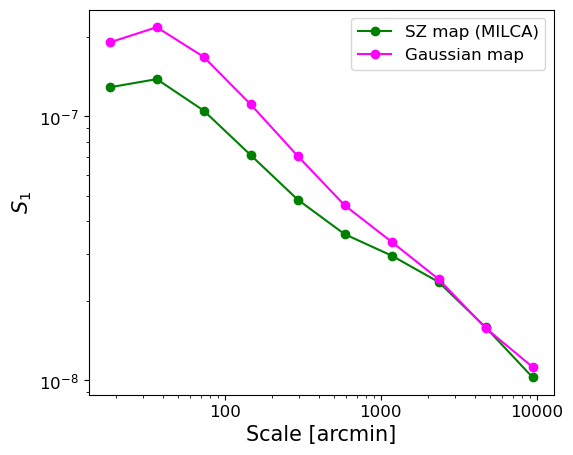

In [182]:
#plt.loglog(scale, np.abs(milca_s1), 'o-', lw=1.5)
plt.loglog(scale, milca_s1, 'o-', lw=1.5 , color ="green" )
plt.loglog(scale, gaus_s1, 'o-', lw=1.5 , color = "magenta")

plt.legend(["SZ map (MILCA)", "Gaussian map"])
plt.xticks ([100,  1000, 10000],[100,1000, 10000])
plt.xlabel("Scale [arcmin]")
plt.ylabel (r"$S_1$")
plt.savefig("SZ_S1.pdf",bbox_inches = 'tight', pad_inches=0.1)

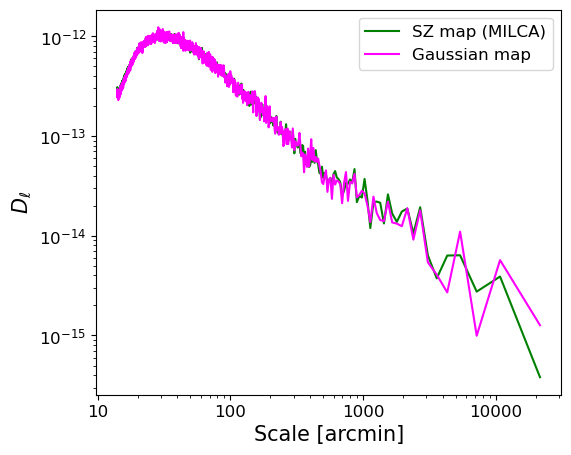

In [183]:
#plt.loglog(scale, np.abs(milca_s1)**2, 'o-', lw=1.5)
#plt.loglog(scale, gaus_s1**2, 'o-', lw=1.5 )
#plt.set_size_inches(18.5, 10.5, forward=True)

plt.loglog (ellsc, sz_dl , color = "green")
plt.loglog (ellsc, norm*hp.anafast(gaus_map) , color = "magenta")

plt.legend(["SZ map (MILCA)", "Gaussian map"])
plt.xticks ([10, 100,  1000,10000],[10, 100,1000, 10000])
plt.xlabel("Scale [arcmin]")
plt.ylabel (r"$D_\ell$")
plt.savefig("SZ_cl.pdf",bbox_inches = 'tight', pad_inches=0.1)

In [48]:
gaus_dl = norm*hp.anafast(gaus_map)

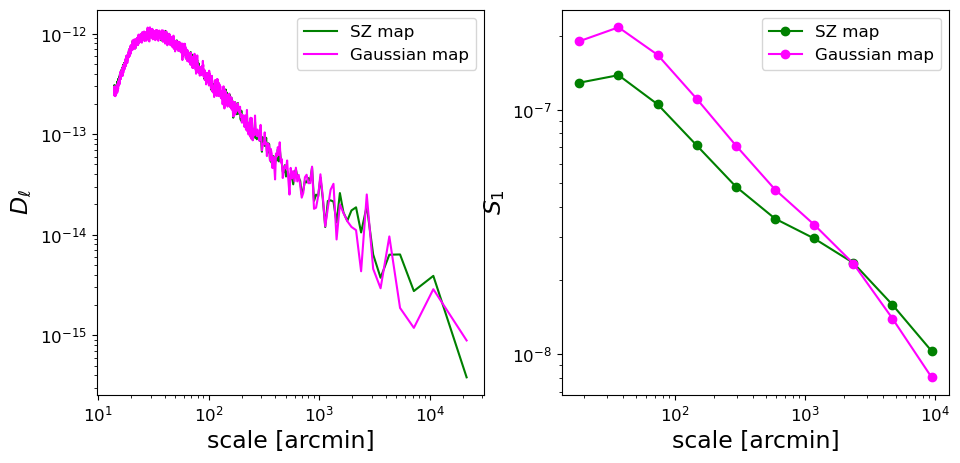

In [64]:
fig, ax = plt.subplots(1, 2,sharey=False,figsize=(11,5))
ax[0].loglog (ellsc, sz_dl , color = "green")
ax[0].loglog (ellsc, gaus_dl , color = "magenta")


ax[0].set_xlabel("scale [arcmin]")
ax[0].set_ylabel (r"$D_\ell$")
ax[0].legend(["SZ map", "Gaussian map"])
ax[1].loglog(scale, milca_s1, 'o-', lw=1.5 , color ="green" )
ax[1].loglog(scale, gaus_s1, 'o-', lw=1.5 , color = "magenta")

ax[1].legend(["SZ map (MILCA)", "Gaussian map"])
ax[1].set_xlabel("scale [arcmin]")
ax[1].set_ylabel (r"$S_1$")
plt.savefig("SZ_S11.pdf")


In [23]:
gaus_s1 , gaus_i1 = ST.compS1(gaus_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9


In [24]:
gaus_s2 , gaus_i2 = ST.compS2(gaus_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9


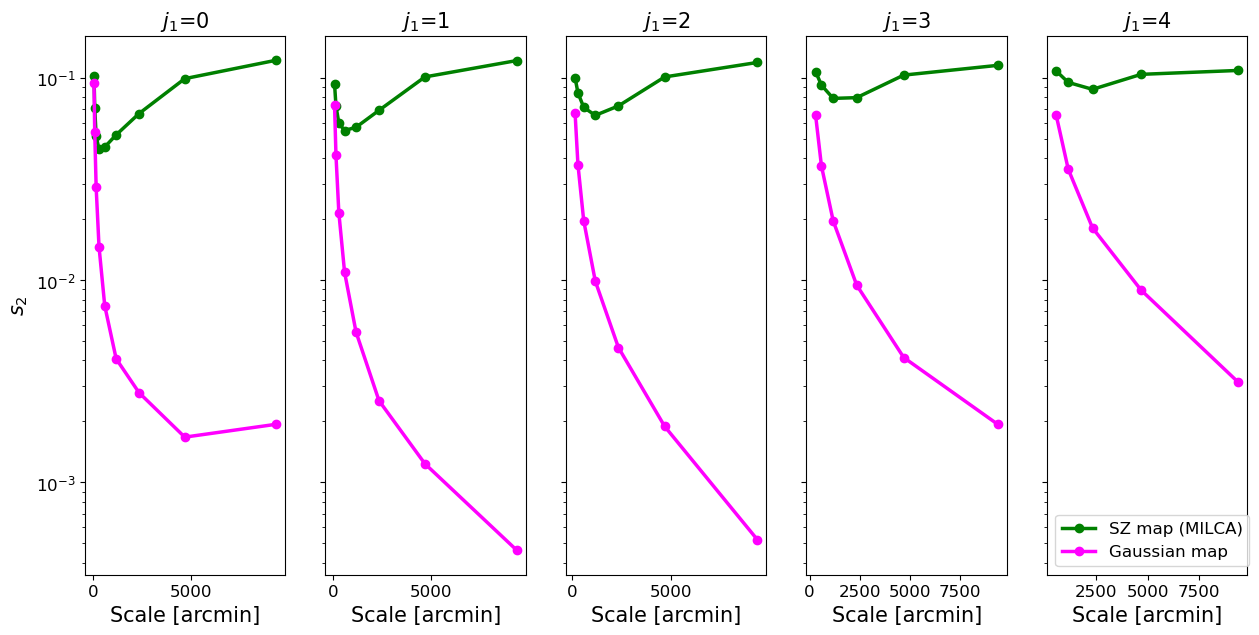

In [186]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(15,7))
for j in range (5):
    ax[j].plot (scale[j+1:],milca_s2[j,j+1:]/milca_s1[j],'o-' , lw = 2.5 , color = "green")
    ax[j].plot (scale[j+1:],gaus_s2[j,j+1:]/gaus_s1[j],'o-'  , lw = 2.5, color = "magenta")
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel("Scale [arcmin]")
    ax[j].set_yscale('log')
    #ax[j].legend (["SZ map", "Gaussian map"])
ax[0].set_ylabel(r"$s_2$" )
#ax[-1].legend (["SZ map", "Gaussian map"])
plt.legend(["SZ map (MILCA)", "Gaussian map"])
plt.savefig("SZ_Gaus_S2.pdf", bbox_inches = 'tight', pad_inches=0.1)

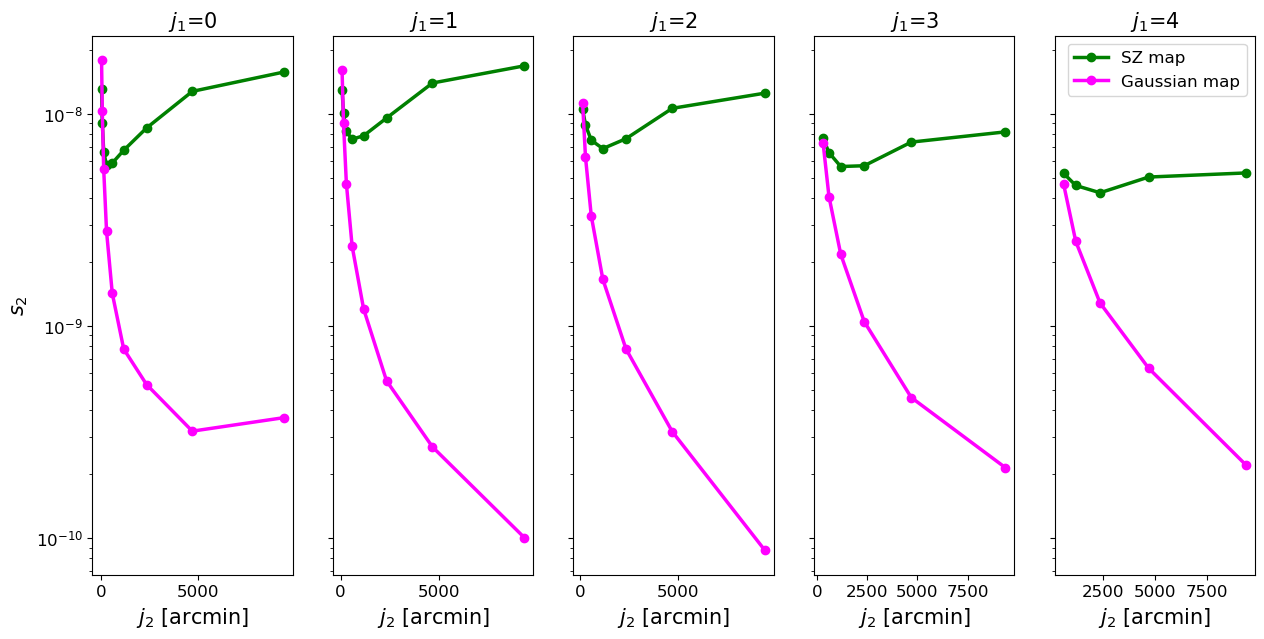

In [170]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(15,7))
for j in range (5):
    ax[j].plot (scale[j+1:],milca_s2[j,j+1:],'o-' , lw = 2.5 , color = "green")
    ax[j].plot (scale[j+1:],gaus_s2[j,j+1:],'o-'  , lw = 2.5, color = "magenta")
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel(r"$j_2$ [arcmin]")
    ax[j].set_yscale('log')
    #ax[j].legend (["SZ map", "Gaussian map"])
ax[0].set_ylabel(r"$s_2$" )
#ax[-1].legend (["SZ map", "Gaussian map"])
plt.legend(["SZ map", "Gaussian map"])

In [85]:
gaus_s2[0]

array([2.56959898e-08, 1.78343271e-08, 1.02721326e-08, 5.45369736e-09,
       2.76098880e-09, 1.38998408e-09, 7.71330971e-10, 5.34196430e-10,
       3.24508039e-10])

In [67]:
milca_s3 = ST.compS3(milca_i2, morlet_l_arr, jmax, nside)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 7
6 8
6 9
7 8
7 9
8 9


In [68]:
gaus_s3 = ST.compS3(gaus_i2, morlet_l_arr, jmax, nside)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 7
6 8
6 9
7 8
7 9
8 9


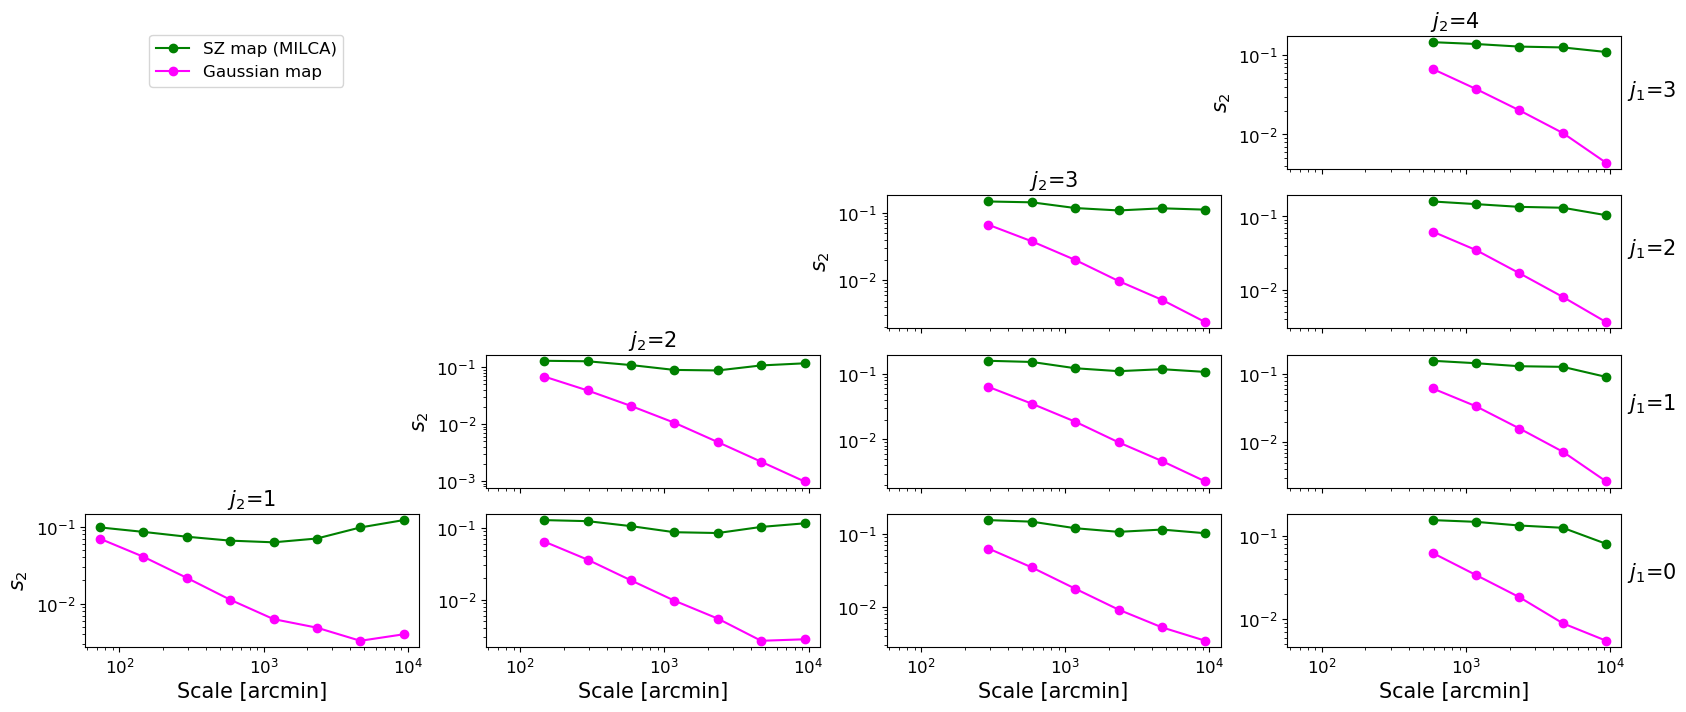

In [187]:
fig, ax = plt.subplots(5 , 5,sharey=False,sharex=True,squeeze=True,figsize=(25,10))
for j1 in range (5):
    for j2 in range (j1+1 , 5 ):
        #print (jmax-j1-1,j2)
        ax[5-j1-1,j2].loglog (scale[j2+1:],milca_s3[j1 , j2,j2+1:]/milca_s2[j1,j2],'o-', color = "green")
        ax[5-j1-1,j2].loglog (scale[j2+1:],gaus_s3[j1 , j2,j2+1:]/gaus_s2[j1,j2],'o-' , color = "magenta")
        ax[5-j2,j2].set_title(r"$j_2$=%d"%j2)
        ax[5-j2,j2].set_ylabel(r"$s_2$" )
        #fig.delaxes(ax[])
        #ax[j1,j2].plot (scale_0256,np.log(s3_sz_0256_nofilt[j1,j2,:]),'o-')
        #ax[j1,j2].set_title("j1=%d"%j1)
        #ax[j1,j2].set_xscale('log')
        #ax[j1,j2].legend()
    #ax[j1,0:j1+1].set_visible(False)
        ax[4,j2].set_xlabel("Scale [arcmin]")
    ax[5-j1-1,4].text(13000 , 0.03 , r"$j_1$=%d"%j1, size=15)
#ax[1,4].set_title(r"$j_2$=%d"%4)
for j1 in range (5):
    for j2 in range (0,j1+1):
        #print ("hoy")
        ax[5-j1-1,j2].remove()#set_visible(False)
    #ax[j].set_title(r"$j_1$=%d"%j)
    #ax[j].set_xlabel(r"$j_2$ [arcmin]")
    
fig.legend(["SZ map (MILCA)", "Gaussian map"], loc ="upper center", bbox_to_anchor=(0.1, 0.23, 0.5, 0.5))
plt.savefig("SZ_S3.pdf", bbox_inches = 'tight', pad_inches=0.1)

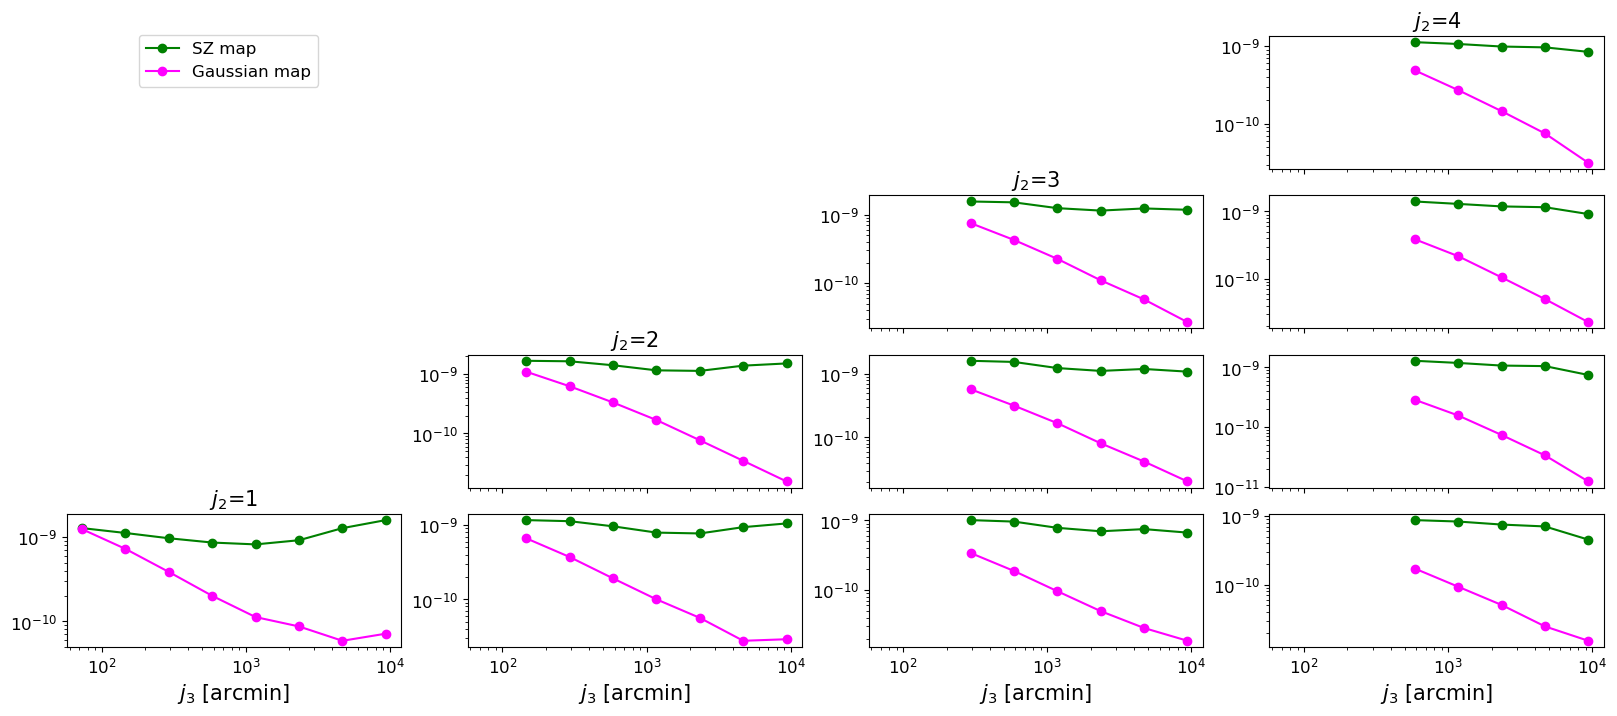

In [180]:
fig, ax = plt.subplots(5 , 5,sharey=False,sharex=True,squeeze=True,figsize=(25,10))
for j1 in range (5):
    for j2 in range (j1+1 , 5 ):
        #print (jmax-j1-1,j2)
        ax[5-j1-1,j2].loglog (scale[j2+1:],milca_s3[j1 , j2,j2+1:],'o-', color = "green")
        ax[5-j1-1,j2].loglog (scale[j2+1:],gaus_s3[j1 , j2,j2+1:],'o-' , color = "magenta")
        ax[5-j2,j2].set_title(r"$j_2$=%d"%j2)
        
        #fig.delaxes(ax[])
        #ax[j1,j2].plot (scale_0256,np.log(s3_sz_0256_nofilt[j1,j2,:]),'o-')
        #ax[j1,j2].set_title("j1=%d"%j1)
        #ax[j1,j2].set_xscale('log')
        #ax[j1,j2].legend()
    #ax[j1,0:j1+1].set_visible(False)
        ax[4,j2].set_xlabel(r"$j_3$ [arcmin]")
    #ax[5-j1-1,4].text(13000 , 0.03 , r"$j_1$=%d"%j1, size=15)
#ax[1,4].set_title(r"$j_2$=%d"%4)
for j1 in range (5):
    for j2 in range (0,j1+1):
        #print ("hoy")
        ax[5-j1-1,j2].remove()#set_visible(False)
    #ax[j].set_title(r"$j_1$=%d"%j)
    #ax[j].set_xlabel(r"$j_2$ [arcmin]")
fig.legend(["SZ map", "Gaussian map"], loc ="upper center", bbox_to_anchor=(0.1, 0.23, 0.5, 0.5))

In [121]:
milca_s3 [2,5,:]/milca_s2[2,5]

array([0.00317165, 0.01064182, 0.03342308, 0.08662265, 0.13881626,
       0.13772625, 0.14495058, 0.14218906, 0.13209476, 0.08263091])

In [125]:
milca_s3

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.87255773e-09, 1.54699380e-09, 1.28330019e-09, 1.12286897e-09,
         9.72016904e-10, 8.64228274e-10, 8.21569674e-10, 9.20933333e-10,
         1.28183940e-09, 1.59784018e-09],
        [8.45660550e-10, 1.27261511e-09, 1.13170244e-09, 1.16524601e-09,
         1.12627661e-09, 9.60633719e-10, 7.90645286e-10, 7.70207717e-10,
         9.36444739e-10, 1.05057175e-09],
        [2.36205625e-10, 5.95131634e-10, 9.17323475e-10, 8.94916630e-10,
         1.01180605e-09, 9.63107404e-10, 7.83478920e-10, 6.98848354e-10,
         7.50945058e-10, 6.68993997e-10],
        [5.73180631e-11, 1.80157170e-10, 4.70044458e-10, 7.74188777e-10,
         7.99496143e-10, 8.73316612e-10, 8.32200759e-10, 7.51979112e-10,
         7.05967111e-10, 4.53338240e-10],
        [1.57669530e-11, 5.33251812e-11, 1.69798961e-10, 4.5